# Aprendizaje Supervisado - Clasificación

Para entender mejor los algoritmos de *Machine Learning* es recomendable trabajar con *datasets* con pocas características (una o dos) con el fin de poder realizar las respectivas visualizaciones (2D). 

La función ***make_blobs*** tiene la capacidad de generar un *dataset* sintético con dos dimensiones (características) y el problemade es una clasificación binaria.

In [104]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0)

print("X -> n_samples: ", X.shape[0])
print("X -> n_features: ", X.shape[1])
print("y -> n_samples: ", y.shape[0])

X -> n_samples:  100
X -> n_features:  2
y -> n_samples:  100


In [105]:
print("Primeras diez muestras: \n", X[:10, :])
print("Primeras diez etiquetas: \n", y[:10])

Primeras diez muestras: 
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]
 [ 1.44193252  2.76754364]
 [ 1.0220286   4.11660348]
 [ 3.97820955  2.37817845]
 [ 0.58894326  4.00148458]
 [ 1.25185786  0.20811388]]
Primeras diez etiquetas: 
 [1 1 0 0 1 0 0 1 0 1]


Como se menciono antes, los datos son bidimensionales (dos características) y se pueden representar facilmente en un sistema de coordenadas 2D.

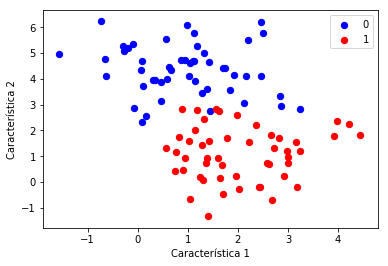

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=40, label='1')

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend(loc='upper right');

Se dividirá el *dataset* en los conjuntos *train* y *test con la función *train_test_split* manteniendo las proporciones entre las clases en los conjuntos realianzado una partición estratificada. 

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    train_size=0.75,
                                                    random_state=123,
                                                    stratify = y)

In [108]:
print("Número de muestras del conjunto train: ", X_train.shape[0])
print("Número de muestras del conjunto test: ", X_test.shape[0])

Número de muestras del conjunto train:  75
Número de muestras del conjunto test:  25


En ***Scikit-learn*** los modelos y algoritmos cuentan con una interfaz denominada **Estimador**. Para este ejemplo se trabaja con el algortimo de *Regresión Logística*.

In [109]:
from sklearn.linear_model import LogisticRegression

Instanciar el estimador

In [111]:
lr = LogisticRegression()

Entrenar el estimador con los datos del conjunto *train* para construir el modelo mediante la función *fit*.

In [112]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Los parámetros usados en el clasificador son tomados por defecto. Estos pueden ser modificados a la hora de instanciar el estimador pero es recomendable realizar una validación cruzada. Este procedimiento puede realizarse usando la función de *Scikit-learn* ***GridSearchCV***.

Para evaluar el rendimiento del modelo se usará el método *predict*.

In [113]:
prediction = lr.predict(X_test)

In [114]:
import numpy as np

print("Casos correctamente clasificados (CCR) [Precisión] :", 
      np.mean(prediction == y_test))

Casos correctamente clasificados (CCR) [Precisión] : 0.8


*Scikit-learn* cuenta con la función *score* para obtener el rendimiento del modelo:

In [115]:
lr.score(X_test, y_test)

0.8

In [116]:
lr.score(X_train, y_train)

0.9466666666666667

El algortimo de Regresión Logística (*Logistic Regression*)es un modelo lineal, por tanto, busca en donde colocar una frontera entre los dos tipos (0 o 1).

***mglearn*** Helper functions for the book 'Introduction to machine learning with Python'

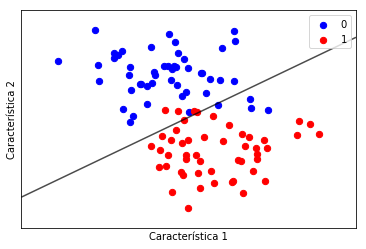

In [117]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=40, label='1')

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

mglearn.plots.plot_2d_separator(lr, X, alpha=.7)
plt.legend(loc='upper right');

Para la regresión logística se estiman dos parámetros: Los coeficientes y el punto de origen de la línea recta.

In [118]:
print("Coeficientes: ", lr.coef_)
print("Punto de intercepción: ", lr.intercept_)

Coeficientes:  [[ 1.26084014 -1.42502367]]
Punto de intercepción:  [1.81793354]


**k Nearest Neighbors kNN**

Ahora se usará otro estimador con el mismo *dataset* para observar como puede mejorar el rendimiento cuando se aplica otro que logre ajustarse más a los datos.

In [119]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [101]:
knn.score(X_test, y_test)

0.88

In [120]:
knn.score(X_train, y_train)

0.9866666666666667

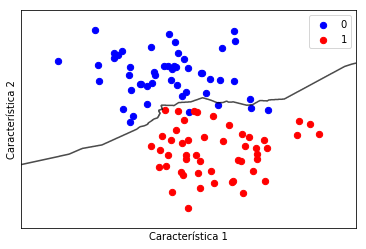

In [121]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=40, label='1')

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

mglearn.plots.plot_2d_separator(knn, X, alpha=.7)
plt.legend(loc='upper right');

Al comparar los resultados obtenidos para ambos modelos se puede observar que kNN se ajusta mejor al *dataset* dando mejores resultados ante nuevos datos.

**Resultados - Regresión Logística**
- Train: 0.946
- Test: 0.8

**Resultados - k Nearest Neigbors**
- Train: 0.986
- Test: 0.88